# Movie recommendation system

## Data source

I used MovieLens 25M dataset provided by GroupLens for this project. This dataset comprises of 25 million movie ratings and 1 million tag applications attributed to 62,000 movies and 162,000 users. Additionally, it includes tag genome data with 15 million relevance scores across 1,129 tags. I mainly used the movies and ratings csv files for my project.

Dataset link: https://grouplens.org/datasets/movielens/25m/

In [1]:
import pandas as pd

movies = pd.read_csv("movies.csv")

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Check missing values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no missing values in this dataset

In [4]:
import re

# Clean the movie titles by removing parentheses or other unwanted characters
def clean_title(title):
    return re.sub("[^a-zA-Z0-9' ]", "", title)

In [5]:
movies['clean_title'] = movies['title'].apply(clean_title)

In [6]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


In [7]:
ratings = pd.read_csv('ratings.csv')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
# Check missing values
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

# Exploratory data analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ratings_number = len(ratings)
movie_number = ratings['movieId'].nunique()
user_number = ratings['userId'].nunique()

print(f"Number of ratings: {ratings_number}")
print(f"Number of unique movies: {movie_number}")
print(f"Number of unique users: {user_number}")
print(f"Average number of ratings per user: {round(ratings_number/user_number, 2)}")
print(f"Average number of ratings per movie: {round(ratings_number/movie_number, 2)}")

Number of ratings: 25000095
Number of unique movies: 59047
Number of unique users: 162541
Average number of ratings per user: 153.81
Average number of ratings per movie: 423.39


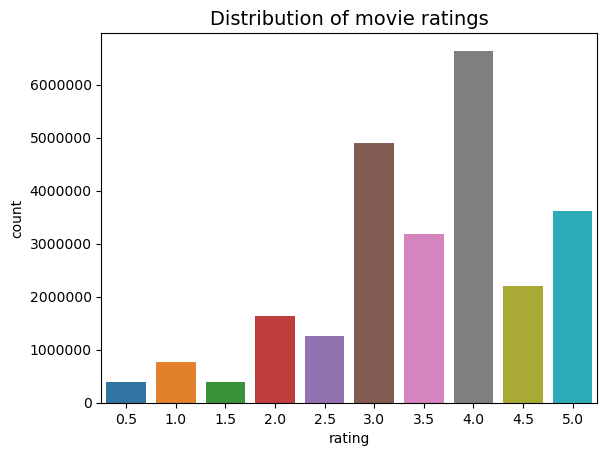

In [13]:
#distribution of movie ratings

sns.countplot(x='rating', data=ratings)
plt.title("Distribution of movie ratings", fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [14]:
# Average movie rating
print(f"Average movie rating: {round(ratings['rating'].mean(), 2)}")

# Average movie rating per user
avg_rating_per_user = ratings.groupby('userId')['rating'].mean()

print(f"Average movie rating per user: {round(avg_rating_per_user.mean(),2)}")

Average movie rating: 3.53
Average movie rating per user: 3.68


In [15]:
# Most frequently rated movies
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts()[0:10]

Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: title, dtype: int64

Forrest Gump (1994), Shawshank Redemption (1994), Pulp Fiction (1994), Silence of the Lambs (1991), and The Matrix (1999) are the 5 most frequently rated movies in this dataset

In [16]:
# Lowest rated movie
avg_movie_rating = ratings.groupby('movieId')[['rating']].mean()
lowest_rated = avg_movie_rating['rating'].idxmin()
movie_ratings[movie_ratings['movieId']== lowest_rated]



,userId,movieId,rating,timestamp,title,genres,clean_title
24979429,70460,5805,0.5,1092107651,Besotted (2001),Drama,Besotted 2001
24979430,143315,5805,0.5,1184971591,Besotted (2001),Drama,Besotted 2001


Besotted (2001) was the lowest rated movie with a 0.5/5 rating

In [17]:
# Highest rated movie
highest_rated = avg_movie_rating['rating'].idxmax()
movie_ratings[movie_ratings['movieId']== highest_rated]

,userId,movieId,rating,timestamp,title,genres,clean_title
24998139,125475,27914,5.0,1409649085,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary,Hijacking Catastrophe 911 Fear the Selling of...


The highest rated documentary was Hijacking Catastrophe: 9/11, Fear and the Selling of American Empire with a rating of 5

But the lowest rated movie had only 2 ratings and highest rated movie had only 1 rating. This is misleading the average rating. A better approach would be to look at the bayesian average to estimate a more accurate average value

In [18]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,57309,3.893708
2,24228,3.251527
3,11804,3.142028
4,2523,2.853547
5,11714,3.058434


In [19]:
# Bayesian average function
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

In [20]:
Hijacking_Catastrophe = pd.Series(5)

bayesian_avg(Hijacking_Catastrophe)

3.076

Hijacking Catastrophe: 9/11, Fear and the Selling of American Empire actually has a bayesian average of only 3.076. So it is not the most popular highest rated movie in the dataset

In [21]:
# Calculate bayesian average for all movies
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()

# Add bayesian average column to movie_stats df
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
movie_stats = movie_stats.merge(movies[['movieId', 'title']])

# Highest rated movie using bayesian average
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
314,318,81482,4.413576,4.407,"Shawshank Redemption, The (1994)"
840,858,52498,4.324336,4.314,"Godfather, The (1972)"
49,50,55366,4.284353,4.275,"Usual Suspects, The (1995)"
1190,1221,34188,4.261759,4.247,"Godfather: Part II, The (1974)"
522,527,60411,4.247579,4.239,Schindler's List (1993)


The Shawshank Redemption (1994), The Godfather (1972), and The Usual Suspects (1995) are the highest rated movies using bayesian average. This reflects more accurate popular movies 

In [22]:
# Lowest rated movie using bayesian average
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
3494,3593,4268,1.578374,1.713,Battlefield Earth (2000)
6464,6587,758,1.214380,1.880,Gigli (2003)
4669,4775,669,1.125561,1.880,Glitter (2001)
11349,50798,1180,1.457203,1.883,Epic Movie (2007)
9603,31698,633,1.232227,1.969,Son of the Mask (2005)


Battlefield Earth (2000), Gigli (2003), and Glitter (2001) are the worst rated movies with below 2.0 ratings. Besotted (2001) wasn't so bad after all

In [23]:
# Split movie genres by | and convert into a list
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres,clean_title
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",Jumanji 1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II 1995


In [24]:
from collections import Counter

genre_count = Counter(g for genres in movies['genres'] for g in genres)

print(f"There are {len(genre_count)} genres")

genre_count

There are 20 genres


Counter({'Adventure': 4145,
         'Animation': 2929,
         'Children': 2935,
         'Comedy': 16870,
         'Fantasy': 2731,
         'Romance': 7719,
         'Drama': 25606,
         'Action': 7348,
         'Crime': 5319,
         'Thriller': 8654,
         'Horror': 5989,
         'Mystery': 2925,
         'Sci-Fi': 3595,
         'IMAX': 195,
         'Documentary': 5605,
         'War': 1874,
         'Musical': 1054,
         'Western': 1399,
         'Film-Noir': 353,
         '(no genres listed)': 5062})

In [25]:
print("The 5 most common genres: \n", genre_count.most_common(5))

The 5 most common genres: 
 [('Drama', 25606), ('Comedy', 16870), ('Thriller', 8654), ('Romance', 7719), ('Action', 7348)]


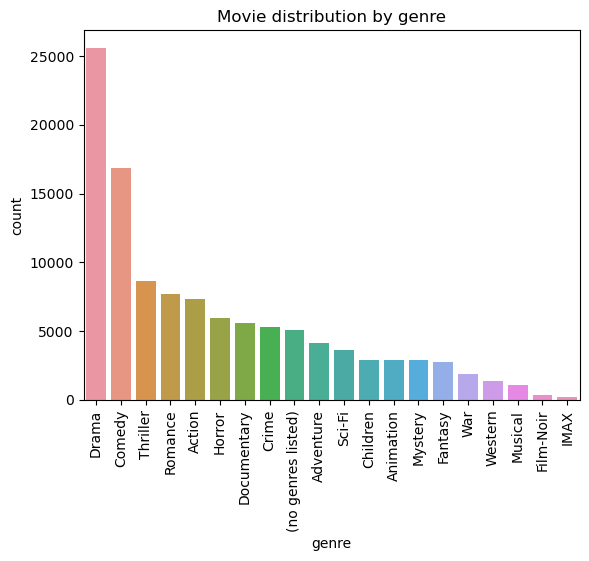

In [26]:
genre_count_df = pd.DataFrame([genre_count]).T.reset_index()
genre_count_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_count_df.sort_values(by='count', ascending=False))
plt.title('Movie distribution by genre')
plt.xticks(rotation=90)
plt.show()

Drama, comedy, thriller, romance and action are the five most common genres in the dataset

# Models

## Model 1: Content-based filtering

In [27]:
# Apply Inverse Document Frequency to vectorize unique words in titles
# The search bar will return titles based on a vector similarity score 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [28]:
# Fit tfidf vectorizer to the clean movie titles
tfidf = vectorizer.fit_transform(movies['clean_title'])

In [29]:
# Create search function
from sklearn.metrics.pairwise import cosine_similarity 
import numpy as np

def search_func(title):
    title = clean_title(title)
    
    # Vectorize title and create cosine similarity
    title_vec = vectorizer.transform([title])
    similarity = cosine_similarity(title_vec, tfidf)
    
    # Flatten similarity scores
    similarity = similarity.flatten()
    
    # Sort the indices based on similarity scores
    indices = np.argsort(similarity)[::-1]
    
    # Get the top 5 recommendations excluding the input title itself
    top_indices = indices[1:6]
    results = movies.iloc[top_indices]
    return results

## Building search bar

In [30]:
import ipywidgets as widgets
from IPython.display import display

search_movie_input = widgets.Text(value="Apollo 13", description="Movie title:", disabled=False)

search_movie_output = widgets.Output()

# Function to get recommended outputs
def type_movie(data):
    with search_movie_output:
        search_movie_output.clear_output()
        title = data['new']
        if len(title) > 5:
            display(search_func(title))
            
search_movie_input.observe(type_movie, names='value')

# Display widget
display(search_movie_input, search_movie_output)

Text(value='Apollo 13', description='Movie title:')

Output()

Search any movie in the above search bar to find out 5 recommended movies

## Model evaluation

We will evaluate this model using recall@K, precision@K and F1 score. To calculate Recall@K, we need to define the ground truth for each user, which in this case, are the movies the user has actually seen. Then, we compare the recommendations made by the system to these ground truth movies

Let's create some sample ground truth data to evaluate the model

In [31]:
ground_truth_data = {
    'user1': ['The Shawshank Redemption', 'The Godfather', 'The Dark Knight'],
    'user2': ['The Godfather', 'The Dark Knight', 'Inception'],
    'user3': ['Pulp Fiction', 'Fight Club', 'Forrest Gump'],
    'user4': ['The Shawshank Redemption', 'The Godfather', 'Inception'],
    'user5': ['The Godfather', 'The Dark Knight', 'Fight Club']
}

In [32]:
# Sample movie data we want to test
sample_movies = {
    'clean_title': [
        'The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 
        'Inception', 'Pulp Fiction', 'Fight Club', 'Forrest Gump', 
        'The Matrix', 'Interstellar', 'The Silence of the Lambs',
        'Schindler\'s List', 'The Lord of the Rings: The Fellowship of the Ring',
        'The Godfather: Part II', 'The Green Mile', 'Goodfellas'
    ]
}

Next we'll modify the search_func to accept a user ID and return the recommendations for that user. Then, we'll calculate the Recall@K for each user based on the recommendations generated by the system compared to their ground truth

In [33]:
# TF-IDF vectorization
vectorizer2 = TfidfVectorizer(ngram_range=(1,2))
tfidf2 = vectorizer2.fit_transform(sample_movies['clean_title'])

In [63]:
def search_func_eval(user_id, k=10):
    seen_movies = ground_truth_data.get(user_id, [])
    if not seen_movies:
        return "User not found or no movies seen by the user."
    
    recommendations2 = []
    for title in seen_movies:
        title_vec2 = vectorizer2.transform([title])
        similarity2 = cosine_similarity(title_vec2, tfidf2)
        indices2 = np.argsort(similarity2.flatten())[::-1][:k]
        results2 = [sample_movies['clean_title'][i] for i in indices2]
        recommendations2.extend(results2)

    return recommendations2[:k]


We'll calculate Recall@K for each user

In [46]:
def calculate_recall_at_k(user_id, k=10):
    seen_movies = set(ground_truth_data.get(user_id, []))
    if not seen_movies:
        return None
    
    recommendations2 = search_func_eval(user_id, k)
    relevant_recommendations = set(recommendations2) & seen_movies
    recall_at_k = len(relevant_recommendations) / len(seen_movies)
    return recall_at_k

In [47]:
# Calculate Recall@K for each user
recall_results = {}
for user_id in ground_truth_data:
    recall_results[user_id] = calculate_recall_at_k(user_id)

# Calculate average Recall@K across all users
average_recall_at_k = np.mean(list(recall_results.values()))
print("Average Recall@K:", average_recall_at_k)

Average Recall@K: 0.7333333333333332


Recall@K gives a measure of how many of the relevant items are present in top K out of all the relevant items, where K is the number of recommendations generated for a user. Our content-based filtering method was able to get an average recall@K value of 0.733

In [48]:
# Precision@K metric
def calculate_precision_at_k(user_id, k=10):
    seen_movies = set(ground_truth_data.get(user_id, []))
    if not seen_movies:
        return None
    
    recommendations2 = search_func_eval(user_id, k)
    relevant_recommendations2 = set(recommendations2) & seen_movies
    precision_at_k = len(relevant_recommendations2) / k
    return precision_at_k

# Calculate Precision@K for each user
precision_results = {}
for user_id in ground_truth_data:
    precision_results[user_id] = calculate_precision_at_k(user_id)

# Calculate average Precision@K across all users
average_precision_at_k = np.mean(list(precision_results.values()))
print("Average Precision@K:", average_precision_at_k)


Average Precision@K: 0.21999999999999997


Precision@K gives a measure of “out of K” items recommended to a user and how many are relevant, where K is the number of recommendations generated for a user. The precision@K metric is 0.22 for this model

In [49]:
# F1 score metric

def calculate_f1_score_at_k(user_id, k=10):
    precision = calculate_precision_at_k(user_id, k)
    recall = calculate_recall_at_k(user_id, k)
    
    if precision is None or recall is None or precision + recall == 0:
        return 0
    
    f1_score_at_k = 2 * (precision * recall) / (precision + recall)
    return f1_score_at_k

# Calculate F1 Score@K for each user
f1_score_results = {}
for user_id in ground_truth_data:
    f1_score_results[user_id] = calculate_f1_score_at_k(user_id)

# Calculate average F1 Score@K across all users
average_f1_score_at_k = np.mean(list(f1_score_results.values()))
print("Average F1 Score@K:", average_f1_score_at_k)


Average F1 Score@K: 0.3384615384615385


F1 Score is a combination of Precision and Recall using harmonic mean. The F1 score for this model is 0.34

## Model 2: Collaborative filtering 

In [50]:
movie_id = 1

In [51]:
# Find similar users 
# Similar users watched same movie and  gave it a rating of greater than 4 stars  
similar_users = ratings[(ratings['movieId'] == movie_id) & (ratings['rating'] > 4)]['userId'].unique()

In [52]:
# Similar users recommended movies 
# Users that like similar movies as us and we want to find out which movies they rated greater than 4 stars
similar_recomm = ratings[(ratings['userId'].isin(similar_users)) & (ratings['rating'] > 4)]['movieId']

In [53]:
similar_recomm

5101            1
5105           34
5111          110
5114          150
5127          260
            ...  
24998854    60069
24998861    67997
24998876    78499
24998884    81591
24998888    88129
Name: movieId, Length: 1358326, dtype: int64

In [54]:
# Find movies that more than 10% of similar users liked 
similar_recomm = similar_recomm.value_counts() / len(similar_users)
similar_recomm = similar_recomm[similar_recomm > 0.1]

In [55]:
# Now we want to differentiate between movies that users similar to us liked compared to movies that everyone liked
# We want to recommend movies that more closely match with likings of users similar to us 

# How much all the users in the dataset liked the movies we liked 
all_users = ratings[(ratings['movieId'].isin(similar_recomm.index)) & (ratings['rating'] > 4)]

In [56]:
# All users recommended movies
all_users_recomm = all_users['movieId'].value_counts() / len(all_users['userId'].unique())


In [57]:
all_users_recomm

318      0.342220
296      0.284674
2571     0.244033
356      0.235266
593      0.225909
           ...   
551      0.040918
50872    0.039111
745      0.037031
78499    0.035131
2355     0.025091
Name: movieId, Length: 113, dtype: float64

## Creating recommendation score

In [58]:
# Combine % recommendations for similar and all users
recomm_score = pd.concat([similar_recomm, all_users_recomm], axis=1)
recomm_score.columns = ['similar_users', 'all_users']

In [59]:
# Calculate recommendation score
recomm_score['score'] = recomm_score['similar_users']/ recomm_score['all_users']
recomm_score = recomm_score.sort_values('score', ascending=False)

In [60]:
# Get 10 highest recommendation score
recomm_score.head(10).merge(movies, left_index=True, right_on='movieId')

,similar_users,all_users,score,movieId,title,genres,clean_title
0,1.000000,0.124728,8.017414,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
3021,0.280648,0.053706,5.225654,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 2 1999
2264,0.110539,0.025091,4.405452,2355,"Bug's Life, A (1998)","[Adventure, Animation, Children, Comedy]",Bug's Life A 1998
14813,0.152960,0.035131,4.354038,78499,Toy Story 3 (2010),"[Adventure, Animation, Children, Comedy, Fanta...",Toy Story 3 2010
4780,0.235147,0.070811,3.320783,4886,"Monsters, Inc. (2001)","[Adventure, Animation, Children, Comedy, Fantasy]",Monsters Inc 2001
580,0.216618,0.067513,3.208539,588,Aladdin (1992),"[Adventure, Animation, Children, Comedy, Musical]",Aladdin 1992
6258,0.228139,0.072268,3.156862,6377,Finding Nemo (2003),"[Adventure, Animation, Children, Comedy]",Finding Nemo 2003
587,0.179400,0.059977,2.991150,595,Beauty and the Beast (1991),"[Animation, Children, Fantasy, Musical, Romanc...",Beauty and the Beast 1991
8246,0.203504,0.068453,2.972889,8961,"Incredibles, The (2004)","[Action, Adventure, Animation, Children, Comedy]",Incredibles The 2004
359,0.253411,0.085764,2.954762,364,"Lion King, The (1994)","[Adventure, Animation, Children, Drama, Musica...",Lion King The 1994


## Recommendation function

In [61]:
# Build a function to recommend movies
def recommend_movie(movie_id):
    # Find movies that similar users liked
    similar_users = ratings[(ratings['movieId'] == movie_id) & (ratings['rating'] > 4)]['userId'].unique()
    similar_recomm = ratings[(ratings['userId'].isin(similar_users)) & (ratings['rating'] > 4)]['movieId']
    similar_recomm = similar_recomm.value_counts() / len(similar_users)
    similar_recomm = similar_recomm[similar_recomm > 0.1]
    
    # Find movies that all users liked
    all_users = ratings[(ratings['movieId'].isin(similar_recomm.index)) & (ratings['rating'] > 4)]
    all_users_recomm = all_users['movieId'].value_counts() / len(all_users['userId'].unique())

    # Generate recommendation score
    recomm_score = pd.concat([similar_recomm, all_users_recomm], axis=1)
    recomm_score.columns = ['similar_users', 'all_users']
    
    recomm_score['score'] = recomm_score['similar_users']/ recomm_score['all_users']
    recomm_score = recomm_score.sort_values('score', ascending=False)
    
    return recomm_score.head(10).merge(movies, left_index=True, right_on='movieId')[['score', 'title', 'genres']]

In [62]:
# Search bar to get movie recommendations
movie_input_name = widgets.Text(value="Apollo 13", description="Movie title:", disabled=False)

recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search_func(title)
            movie_id = results.iloc[0]['movieId']
            display(recommend_movie(movie_id))
            
movie_input_name.observe(on_type, names="value")

display(movie_input_name, recommendation_list)

Text(value='Apollo 13', description='Movie title:')

Output()

## Model 3: Item-item Recommendations with k-Nearest Neighbors

## Utility matrix

In [64]:
# Create utility matrix
from scipy.sparse import csr_matrix

def create_X(df):
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [65]:
X.shape

(162541, 59047)

The utility matrix has 162541 users and 59047 movies

## Evaluating sparsity

In [66]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.26%


In [68]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 32202 movies.
Least active user rated 20 movies.


In [69]:
n_ratings_per_movie = X.getnnz(axis=0)

print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 81491 ratings.
Least rated movie has 1 ratings.


So, we don't have the cold start problem where there are new users or movies in the matrix. Here least active user rated 20 movies and least rated movie has 1 rating 

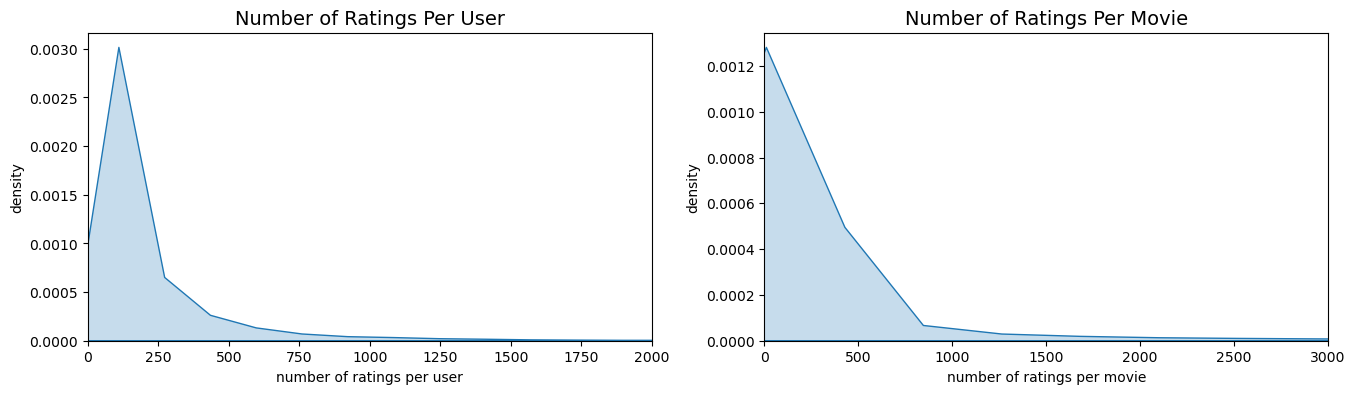

In [70]:
# Distribution of number of ratings per user and number of ratings per movie
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0, 2000)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")

plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, fill=True)
plt.xlim(0, 3000)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

## KNN recommendation function

In [71]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies_knn(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):

    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [72]:
genres = set(g for G in movies['genres'] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))
    
movie_genres = movies.drop(columns=['movieId', 'title','genres', 'clean_title'])

In [73]:
movie_genres.head()

,(no genres listed),Sci-Fi,Documentary,Romance,Mystery,Fantasy,Animation,Children,Adventure,Drama,Thriller,Musical,Action,Horror,War,IMAX,Film-Noir,Crime,Comedy,Western
0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [74]:
movie_genres.shape

(62423, 20)

I sampled 20% of the data to work with a smaller subset as I was running out of memory when creating the recommendation engine

In [75]:
# Subset movie genre to compute matrix calculations
subset_size = int(len(movie_genres)*0.2)

movie_genres = movie_genres.sample(n=subset_size, random_state=45)
movie_genres.shape

(12484, 20)

In [76]:
# Create cosine similarity matrix
cosine_sim = cosine_similarity(movie_genres, movie_genres)

In [77]:
cosine_sim.shape

(12484, 12484)

The movie titles have year included. If users don't enter the exact title including year or misspell words, the recommendation algorithm will not work. To work around this problem, I used fuzzywuzzy library which identifies the most similar string even when titles are misspelled. It will make the function more user-friendly

In [78]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

C:\Users\ASUS ZenBooK\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Let's test this out with intentionally misspelled 'Casper' as 'Cesper' example

In [79]:
title = movie_finder('cesper')
title

'Casper (1995)'

The function was able to correctly identify misspelled movie title 'Cesper' instead of 'Casper'

In [80]:
# create a movie index dictionary where the keys are movie titles and values are movie indices
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for Casper: {idx}")

Movie index for Casper: 156


In [81]:
# function which takes in the movie title of interest and outputs the desired number of recommendations
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])


In [82]:
# Get top recommendation for Toy story
get_content_based_recommendations('Toy story', 1)

Because you watched Toy Story (1995):
7    Tom and Huck (1995)
Name: title, dtype: object
